In [4]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [5]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# 生成 斜向三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 生成 稀疏三群 資料點
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

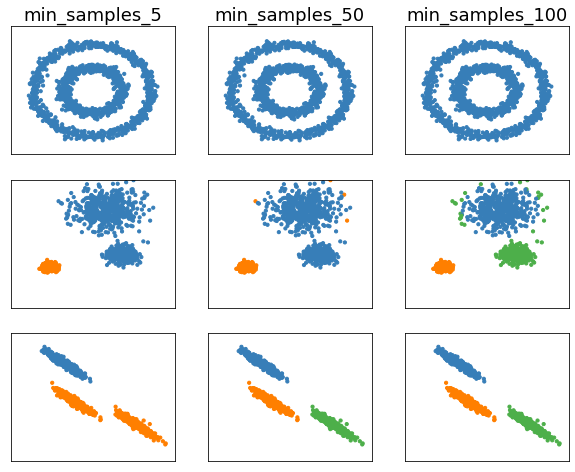

In [7]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1

datasets = [noisy_circles, 
            varied, 
            aniso]

# 執行各種樣板資料的繪圖迴圈
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 DBSCAN
    min_samples_5 = cluster.DBSCAN(min_samples=5)
    min_samples_50 = cluster.DBSCAN(min_samples=50)
    min_samples_100 = cluster.DBSCAN(min_samples=100)

    clustering_algorithms = (
        ('min_samples_5', min_samples_5),
        ('min_samples_50', min_samples_50),
        ('min_samples_100', min_samples_100))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        y_pred = algorithm.fit_predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))

        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.show()